# Maps data

In [1]:
import PIL
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
PIL.Image.MAX_IMAGE_PIXELS = 268435460
classifier = Image.open("/commons/Themas/Thema11/Giepmans/Maps_topography.tif")
data = Image.open("/commons/Themas/Thema11/Giepmans/Maps_satelliteBW.tif")
print(classifier.format)

print(classifier.size)

print(classifier.mode)

print(data.format)

print(data.size)

print(data.mode)


# show the image

#image.show()

#data = np.asarray(data)
#im2 = cv.pyrDown(data)
#im2 = cv.pyrUp(im2)
#im2 = Image.fromarray(im2)
#print(im2.size)
#im2.save('low_poly.jpg')


TIFF
(16384, 16384)
RGB
TIFF
(16384, 16384)
L


As shown above, the classifier is a TIFF file with dimensions 16384 x 16384, and has RGB as its mode. This means the image is 3 dimensional, the 3rd dimension being the color channels.
The data itself is also a TIFF file with dimension 16384 x 16384. This image however has mode L. This means every pixel is encoded in 8-bits. This means they have a value between 0 and 255, this value corrosponds to a shade between black and white.

(268435456, 1)
(16384, 16384)
(16384, 16384)
(16384, 16384)
(16384, 16384)


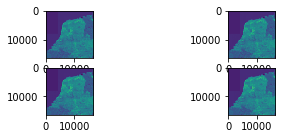

In [67]:
img = cv.imread("/commons/Themas/Thema11/Giepmans/Maps_satelliteBW.tif", cv.IMREAD_GRAYSCALE)
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
layer = img.copy()

total_np = np.array(layer).flatten().transpose()
total_np = total_np.reshape(total_np.shape[0], 1)

print(total_np.shape)
  
for i in range(4):
    plt.subplot(4, 2, i + 1)
  
    # using pyrDown() function
    layer = cv.pyrDown(layer)
    
    lay2 = layer.copy()
    for i in range(i + 1):
        lay2 = cv.pyrUp(lay2)
  
    plt.imshow(lay2)
    print(lay2.shape)
    
    #total_np = np.dstack((total_np, lay2))
    total_np = np.append(total_np, np.expand_dims(lay2.flatten().transpose(), axis=1), axis=1)
    
    #print(lay2.shape)
    #cv.imshow("str(i)", layer)
    #cv.waitKey(0)
      
#cv.destroyAllWindows()
im_lay2 = Image.fromarray(lay2)
im_lay2.save("low_poly.tif")
#np.save("4x_gausian.npy", total_np)

In [ ]:
for (i, resized) in enumerate(pyramid_gaussian(img, downscale=2)):
    if resized.shape[0] < 30 or resized.shape[1] < 30:
        break
        
    #cv2.imshow("Layer {}".format(i + 1), resized)
    #cv2.waitKey(0)

In [12]:
image_array = np.array(data)

In [59]:
print(image_array.shape)

(16384, 16384)


In [68]:
print(total_np.shape)

(268435456, 5)


In [69]:
img = cv.imread("/commons/Themas/Thema11/Giepmans/Maps_labels.tif")
  
#layer = img.copy()

#total_np = np.array(layer)
#print(img.shape)

classifier = Image.open("/commons/Themas/Thema11/Giepmans/Maps_labels.tif")
classifier = np.array(classifier)
print(classifier.shape)

display(classifier[0:5])
display(np.unique(classifier))

#total_np = np.dstack((total_np, classifier))
classifier = np.expand_dims(classifier.flatten().transpose(), axis=1)
total_np = np.append(total_np, classifier, axis=1)

(16384, 16384)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In the above arrays we can see that the first few values of the classifier array are all 0. This means that on the comblete dataset we'll need to remove the instances that have this label, seeing as 0 stands for no label.
In the bottom array we can see that the classifier image contains labels from 0 to 5. This means we won't have to change the encoding of the labels before training.

In [71]:
print(total_np.shape)
# print(np.unique(total_np[:,:, 5]))
# print(np.unique(total_np[:,:, -1]))
print(np.unique(total_np[:, 5]))
print(np.unique(total_np[:, -1]))

(268435456, 6)
[0 1 2 3 4 5]
[0 1 2 3 4 5]


This code is simpy to display that the classification layer here is layer 5, which is the same as -1.

In [57]:
#print(total_np.reshape(total_np.shape[2], -1))

[[ 24  24  24 ...  31  31  31]
 [ 31   0  31 ...   1  69  69]
 [ 69  69  68 ...  77  83   0]
 [ 33  29  28 ... 131 128 133]
 [126   4 148 ...   0  76  76]
 [ 76  73  70 ...  34  36   0]]


In [82]:
print(total_np[268435455,:])
np.save("total_classification.npy", total_np)

[40 26 23 34 36  0]
